In [49]:
%%shell
jupyter nbconvert --to html 820_final.ipynb

[NbConvertApp] Converting notebook 820_final.ipynb to html
[NbConvertApp] Writing 439783 bytes to 820_final.html


# Loading Basic Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [44]:
df = pd.read_csv("df.csv")

#Data Pre-Processing


In [45]:
# Preview of data
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [46]:
#List of variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##Removing "fnlwgt"

We are removing 'fnlwgt' as it is a post-hoc variable that was created to remove duplicate entries but to assign weight values which, when applied to the dataset, represent the entire US population at the time of the census. This variable has no predictive value.

In [47]:
df = df.drop(['fnlwgt'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


##Recode Income as Binary

In [48]:
for x in range(len(df['income'])):
  if df['income'][x] == ' <=50K':
    df['income'][x] = 1
  elif df['income'][x] == ' >50K':
    df['income'][x] = 0

Validating that it was successful. Let it be declared that our positive target value, 1, represents an income of <=50k. 0 represents >50k. We can also see below that we will need to use SMOTE oversampling to account for our imbalance.

In [12]:
df['income'].value_counts()

1    24720
0     7841
Name: income, dtype: int64

##Missing Values
3 columns, all categorical, contain missing values.

In [13]:
df[df == ' ?'].count()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Removing the rows which contain missing values (listwise).

In [14]:
df = df[df['workclass'] != ' ?']
df = df[df['occupation'] != ' ?']
df = df[df['native-country'] != ' ?']
df['income'] = df['income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


Rerunning missing values code to ensure it worked.

In [15]:
df[df == ' ?'].count()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

##Encode Categorical Variables

In [16]:
df2 = pd.get_dummies(df, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

The new shape of our data:

In [17]:
df2.shape

(30162, 104)

##Declare Predictor Variable

In [18]:
X = df2.drop(['income'], axis=1)
y = df2['income']

#Technical Reports

## Descriptive Statistics

Dataframe preview:

In [19]:
print('Shape of dataframe:', df.shape)
df.head(15)

Shape of dataframe: (30162, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0


###Numeric Variables

Descriptive statistics about numeric data after removing missing values.

In [20]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238,0.751078
std,13.134665,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


###Categorical Variables

Descriptive statistics and count values for categorical data.

In [21]:
df['workclass'].value_counts().to_frame().head(15)

,workclass
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14


In [22]:
df['education'].value_counts().to_frame().head(15)

,education
HS-grad,9840
Some-college,6678
Bachelors,5044
Masters,1627
Assoc-voc,1307
11th,1048
Assoc-acdm,1008
10th,820
7th-8th,557
Prof-school,542


In [23]:
df['marital-status'].value_counts().to_frame().head(15)

,marital-status
Married-civ-spouse,14065
Never-married,9726
Divorced,4214
Separated,939
Widowed,827
Married-spouse-absent,370
Married-AF-spouse,21


In [24]:
df['occupation'].value_counts().to_frame().head(15)

,occupation
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
Transport-moving,1572
Handlers-cleaners,1350
Farming-fishing,989


In [25]:
df['relationship'].value_counts().to_frame().head(15)

,relationship
Husband,12463
Not-in-family,7726
Own-child,4466
Unmarried,3212
Wife,1406
Other-relative,889


In [26]:
df['race'].value_counts().to_frame().head(15)

,race
White,25933
Black,2817
Asian-Pac-Islander,895
Amer-Indian-Eskimo,286
Other,231


In [27]:
df['sex'].value_counts().to_frame().head(15)

,sex
Male,20380
Female,9782


In [28]:
df['native-country'].value_counts().to_frame().head(15)

,native-country
United-States,27504
Mexico,610
Philippines,188
Germany,128
Puerto-Rico,109
Canada,107
India,100
El-Salvador,100
Cuba,92
England,86


##Results

Creating empty lists to append our scores into.

In [29]:
#accuracy scores

acc_lr = []
acc_nb = []
acc_knn = []
acc_dt = []
acc_bdt = []
acc_rf = []
acc_svm = []

#precision scores

prec_lr = []
prec_nb = []
prec_knn = []
prec_dt = []
prec_bdt = []
prec_rf = []
prec_svm = []

#recall scores

rec_lr = []
rec_nb = []
rec_knn = []
rec_dt = []
rec_bdt = []
rec_rf = []
rec_svm = []

#f1 scores

f1_lr = []
f1_nb = []
f1_knn = []
f1_dt = []
f1_bdt = []
f1_rf = []
f1_svm = []

#roc_auc scores

roc_auc_lr = []
roc_auc_nb = []
roc_auc_knn = []
roc_auc_dt = []
roc_auc_bdt = []
roc_auc_rf = []
roc_auc_svm = []

Creating a function to evaluate our models with "model" as the first arg. Introduces the idea that X_train and y_train will be oversampled using SMOTE *within* each KFold iteration.

In [30]:
def evaluate_model(model, X_train_oversampled, X_test, y_train_oversampled, y_test):
    from sklearn import metrics
    model.fit(X_train_oversampled, y_train_oversampled)
    global y_pred
    y_pred = model.predict(X_test)

Importing the necessary models, metrics, and KFold processes.

In [32]:
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=10)
folds



StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

Running the models. The models chosen for this assignment are Logistic Regression as a baseline, Gaussian Naive Bayes, K-Nearest Neighbours, 3 Decision Tree classifiers (Decision Tree, Boosted Decision Tree, and Random Forest), and Support Vector Machine (SVM).

In [ ]:
for fold, (train_index, test_index) in enumerate(folds.split(X, y)):
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  sm = SMOTE()
  X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

  #Logistic Regression
  evaluate_model(LogisticRegression(max_iter=3000), X_train_oversampled, X_test, y_train_oversampled, y_test)
  acc_lr.append(accuracy_score(y_test, y_pred))
  prec_lr.append(precision_score(y_test, y_pred))
  rec_lr.append(recall_score(y_test, y_pred))
  f1_lr.append(f1_score(y_test, y_pred))
  roc_auc_lr.append(roc_auc_score(y_test, y_pred))

  #Naive Bayes
  evaluate_model(GaussianNB(), X_train_oversampled, X_test, y_train_oversampled, y_test)
  acc_nb.append(accuracy_score(y_test, y_pred))
  prec_nb.append(precision_score(y_test, y_pred))
  rec_nb.append(recall_score(y_test, y_pred))
  f1_nb.append(f1_score(y_test, y_pred))
  roc_auc_nb.append(roc_auc_score(y_test, y_pred))

  #K-Nearest Neighbours
  evaluate_model(KNeighborsClassifier(), X_train_oversampled, X_test, y_train_oversampled, y_test)
  acc_knn.append(accuracy_score(y_test, y_pred))
  prec_knn.append(precision_score(y_test, y_pred))
  rec_knn.append(recall_score(y_test, y_pred))
  f1_knn.append(f1_score(y_test, y_pred))
  roc_auc_knn.append(roc_auc_score(y_test, y_pred))

  #Decision Tree
  evaluate_model(DecisionTreeClassifier(), X_train_oversampled, X_test, y_train_oversampled, y_test)
  acc_dt.append(accuracy_score(y_test, y_pred))
  prec_dt.append(precision_score(y_test, y_pred))
  rec_dt.append(recall_score(y_test, y_pred))
  f1_dt.append(f1_score(y_test, y_pred))
  roc_auc_dt.append(roc_auc_score(y_test, y_pred))

  #Boosted Decision Tree
  evaluate_model(GradientBoostingClassifier(), X_train_oversampled, X_test, y_train_oversampled, y_test)
  acc_bdt.append(accuracy_score(y_test, y_pred))
  prec_bdt.append(precision_score(y_test, y_pred))
  rec_bdt.append(recall_score(y_test, y_pred))
  f1_bdt.append(f1_score(y_test, y_pred))
  roc_auc_bdt.append(roc_auc_score(y_test, y_pred))

  #Random Forest
  evaluate_model(RandomForestClassifier(), X_train_oversampled, X_test, y_train_oversampled, y_test)
  acc_rf.append(accuracy_score(y_test, y_pred))
  prec_rf.append(precision_score(y_test, y_pred))
  rec_rf.append(recall_score(y_test, y_pred))
  f1_rf.append(f1_score(y_test, y_pred))
  roc_auc_rf.append(roc_auc_score(y_test, y_pred))

  #SVM
  evaluate_model(SVC(), X_train_oversampled, X_test, y_train_oversampled, y_test)
  acc_svm.append(accuracy_score(y_test, y_pred))
  prec_svm.append(precision_score(y_test, y_pred))
  rec_svm.append(recall_score(y_test, y_pred))
  f1_svm.append(f1_score(y_test, y_pred))
  roc_auc_svm.append(roc_auc_score(y_test, y_pred))

Our results use 10 KFold iterations, and as such each our metrics results is a list of 10 items. We want to average these items to get a better picture of how well our models performed.

In [35]:
from numpy import mean

accuracy_LR = mean(acc_lr)
precision_LR = mean(prec_lr)
recall_LR = mean(rec_lr)
f1score_LR = mean(f1_lr)
rocauc_LR = mean(roc_auc_lr)

accuracy_NB = mean(acc_nb)
precision_NB = mean(prec_nb)
recall_NB = mean(rec_nb)
f1score_NB = mean(f1_nb)
rocauc_NB = mean(roc_auc_nb)

accuracy_KNN = mean(acc_knn)
precision_KNN = mean(prec_knn)
recall_KNN = mean(rec_knn)
f1score_KNN = mean(f1_knn)
rocauc_KNN = mean(roc_auc_knn)

accuracy_DT = mean(acc_dt)
precision_DT = mean(prec_dt)
recall_DT = mean(rec_dt)
f1score_DT = mean(f1_dt)
rocauc_DT = mean(roc_auc_dt)

accuracy_BDT = mean(acc_bdt)
precision_BDT = mean(prec_bdt)
recall_BDT = mean(rec_bdt)
f1score_BDT = mean(f1_bdt)
rocauc_BDT = mean(roc_auc_bdt)

accuracy_RF = mean(acc_rf)
precision_RF = mean(prec_rf)
recall_RF = mean(rec_rf)
f1score_RF = mean(f1_rf)
rocauc_RF = mean(roc_auc_rf)

accuracy_SVM = mean(acc_svm)
precision_SVM = mean(prec_svm)
recall_SVM = mean(rec_svm)
f1score_SVM = mean(f1_svm)
rocauc_SVM = mean(roc_auc_svm)

We then want to create a dataframe to be able to visualize our results more effectively, in both table and graph form.

In [36]:
accuracy = [accuracy_LR, accuracy_NB, accuracy_KNN, accuracy_DT, accuracy_BDT, accuracy_RF, accuracy_SVM]
precision = [precision_LR, precision_NB, precision_KNN, precision_DT, precision_BDT, precision_RF, precision_SVM]
recall = [recall_LR, recall_NB, recall_KNN, recall_DT, recall_BDT, recall_RF, recall_SVM]
f1 = [f1score_LR, f1score_NB, f1score_KNN, f1score_DT, f1score_BDT, f1score_RF, f1score_SVM]
roc_auc = [rocauc_LR, rocauc_NB, rocauc_KNN, rocauc_DT, rocauc_BDT, rocauc_RF, rocauc_SVM]

results = pd.DataFrame(
    {'Model' : ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Boosted Decision Tree', 'Random Forest', 'SVM'],
     'Accuracy' : accuracy,
     'Precision' : precision,
     'Recall' : recall,
     'F1' : f1,
     'AUC' : roc_auc
    })


###Table

In [37]:
results

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.838274,0.900022,0.882759,0.891288,0.793401
1,Naive Bayes,0.748525,0.944760,0.706497,0.808422,0.790916
2,KNN,0.785724,0.931153,0.771828,0.844009,0.799740
3,Decision Tree,0.801538,0.881813,0.849651,0.865422,0.753008
4,Boosted Decision Tree,0.835223,0.927926,0.846385,0.885261,0.823963
5,Random Forest,0.834759,0.891556,0.888011,0.889766,0.781044
6,SVM,0.793217,0.804605,0.957138,0.874266,0.627876


###Bar Plots

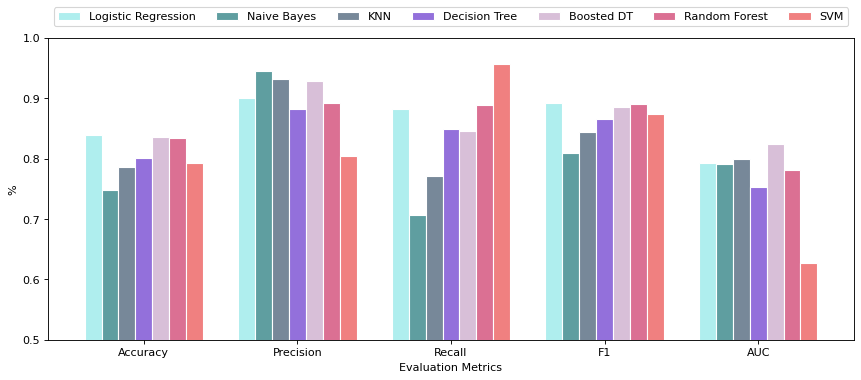

In [38]:
plt.figure(figsize = (13,5), dpi = 80)
plt.ylim(0.5, 1)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
 
avals = results.iloc[0,1:6]
bvals = results.iloc[1,1:6]
cvals = results.iloc[2,1:6]
dvals = results.iloc[3,1:6]
evals = results.iloc[4,1:6]
fvals = results.iloc[5,1:6]
gvals = results.iloc[6,1:6]

x_axis = np.arange(len(metrics))

plt.bar(x_axis - 0.33, avals, color = 'paleturquoise', edgecolor = 'white', width = 0.11, label = 'Logistic Regression')
plt.bar(x_axis - 0.22, bvals, color = 'cadetblue', edgecolor = 'white', width = 0.11, label = 'Naive Bayes')
plt.bar(x_axis - 0.11, cvals, color = 'lightslategrey', edgecolor = 'white', width = 0.11, label = 'KNN')
plt.bar(x_axis, dvals, color = 'mediumpurple', edgecolor = 'white', width = 0.11, label = 'Decision Tree')
plt.bar(x_axis + 0.11, evals, color = 'thistle', edgecolor = 'white', width = 0.11, label = 'Boosted DT')
plt.bar(x_axis + 0.22, fvals, color = 'palevioletred', edgecolor = 'white', width = 0.11, label = 'Random Forest')
plt.bar(x_axis + 0.33, gvals, color = 'lightcoral', edgecolor = 'white', width = 0.11, label = 'SVM')

plt.xticks(x_axis, metrics)
plt.legend(bbox_to_anchor=[0, 1.02, 1, 0.2], loc='lower center', mode = 'expand', ncol = 7)
plt.xlabel("Evaluation Metrics")
plt.ylabel('%')
  
plt.show()

Note the scale of the y-axis, for ease of reading, as no values fell below 0.5. 

From our results, we can see that accuracy was highest for Logistic Regression (our baseline measure), Boosted Decision Tree, and Random Forest. Precision was highest for Naive Bayes, KNN, and Boosted Decision Tree. Recall was highest for SVM, Logistic Regression, and Random Forest. F1 was above 0.84 for all models except Naive Bayes, which was 0.81. ROC_AUC was fairly even across the first three models, though Boosted Decision Tree had the highest score at 0.82. Ranges of 0.7-0.8 are normally considered "acceptable", while ranges of 0.8-0.9 are considered excellent. Though there may not be enough to consider the Boosted Decision Tree AUC score as significantly different from the other scores.

Aside from perhaps the Decision Tree model, each model has areas in which it excels with respect to the other models, and so determining the most effective model will have to be made considering how the strengths and weaknesses relate to the research question.